In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.metrics import r2_score

https://stackoverflow.com/questions/78277467/why-curve-fit-function-not-fit-the-data

In [2]:
data = pd.read_csv("https://pastebin.com/raw/Yszin3Zy", header=1, sep=" ")
data = data.drop("Unnamed: 3", axis=1)
data = data.set_index("t")
data["x"] *= np.pi / 180.

In [3]:
#data = data.loc[100:,:]

In [22]:
q = data.index >= 100.

In [23]:
def model(t, theta_0, tau, T , phi):
    return theta_0 * np.exp(- t / tau) * np.sin(((2 * np.pi) / T) * t + phi)

In [24]:
popt, pcov = optimize.curve_fit(
    model, data.loc[q,:].index, data.x.loc[q], p0=(0.45, 30, 1.3, 0.05)
)
popt, pcov

(array([ 0.59283177, 55.78070436,  1.29195426, -3.42578557]),
 array([[ 3.11221290e-04, -1.40911222e-02,  1.14705436e-08,
          4.98036190e-06],
        [-1.40911222e-02,  6.43364433e-01, -5.22631945e-07,
         -2.26313508e-04],
        [ 1.14705436e-08, -5.22631945e-07,  4.62821001e-09,
          1.99995563e-06],
        [ 4.98036190e-06, -2.26313508e-04,  1.99995563e-06,
          8.71548163e-04]]))

In [25]:
yhat = model(data.index, *popt)

In [26]:
r2_score(data.x[q], yhat[q])

0.9915901662189318

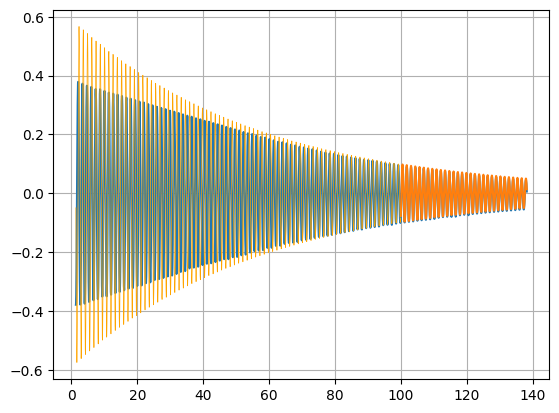

In [32]:
fig, axe = plt.subplots()
axe.plot(data.index, data.x)
axe.plot(data.index[q], yhat[q])
axe.plot(data.index[~q], yhat[~q], linewidth=0.5, color="orange")
axe.grid()